## Visão Geral do Dataset (carregamento e limpeza dos dados)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


d1 = pd.read_csv("/Ciência de Dados Geral/Performance de Estudantes/student-performance-analysis/data/student-mat.csv", sep=";")
d2 = pd.read_csv("/Ciência de Dados Geral/Performance de Estudantes/student-performance-analysis/data/student-por.csv", sep=";")

d3 = pd.merge(d1, d2, on=["school", "sex", "age", "address", "famsize", "Pstatus",
                          "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])

print(len(d3))

382


### Análise Inicial do Dataset

In [3]:
d1.shape

#395 linhas (estudantes) e 33 colunas

(395, 33)

In [4]:
d1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [22]:
d1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [23]:
d1.dtypes

# no total, são 17 colunas object (categóricas) e 16 colunas int (numéricas)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [24]:
d1.dtypes.value_counts()

object    17
int64     16
dtype: int64

In [ ]:
#Dividindo as colunas entre categórias e numéricas para visualizar melhor os dados

col_categoricas = []
col_numericas = []
for coluna in d1.columns:
    if d1[coluna].dtype == 'object':
        col_categoricas.append(coluna)
    elif d1[coluna].dtype == 'int64':
        col_numericas.append(coluna)

In [ ]:
d1[col_categoricas].describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,206,123,188,169,210,80,133,91,170,204,147,117,123,188,227,198,165


In [37]:
d1[col_numericas].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Análise inicial do dataset:
Dataset composto por 395 linhas (estudantes) e 33 colunas. Dentre essas colunas, 17 representam dados categóricos e 16 representam dados numéricos. <br> 
As colunas categóricas são majoritariamente binárias (sim/não, masculino/feminino) e outras são variáveis categóricas nominais (Mjob, Fjob, reason, guardian). <br>
As colunas numéricas são todas do tipo inteiro. Não há dados contínuos (float). A maioria dos dados é classificada como um dado numérico ordinal, como Medu - educação da mãe (0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education), studytime - tempo de estudo por semana (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) e assim por diante. Eles representam escalas (0 à 5, 1 à 3 ...) <br>
Age, absences e as notas (G1, G2 e G3) estão em escalas maiores.

### Conferindo valores ausentes e identificando outliers

In [3]:
d1.isnull().sum()

#sem valores nulos

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [34]:
d1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


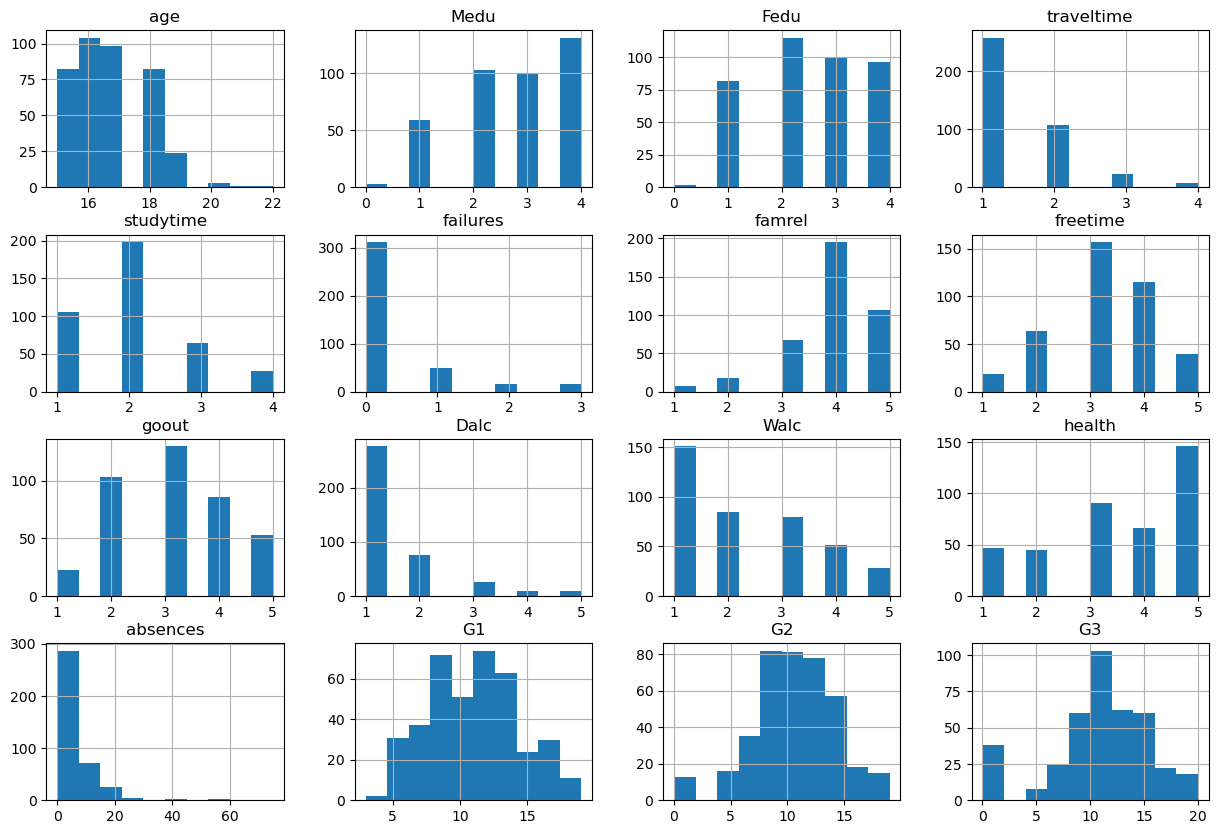

In [36]:
# Distribuição dos dados
d1.hist(bins=10, figsize=(15, 10))
plt.show()

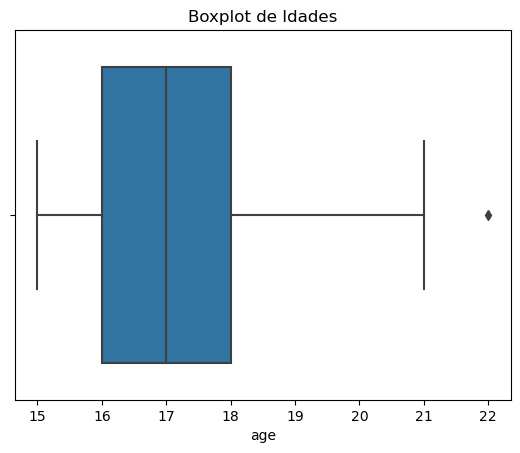

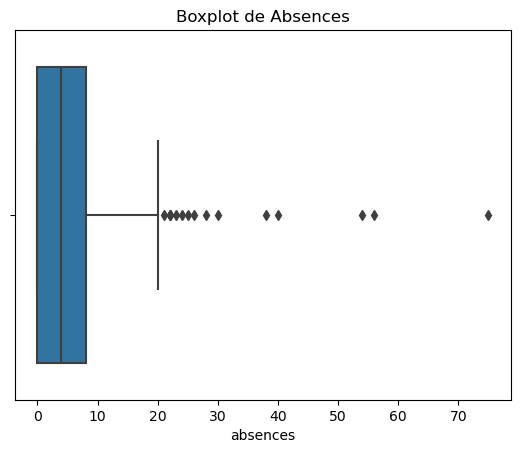

In [45]:
sns.boxplot(x=d1['age'])
plt.title('Boxplot de Idades')
plt.show()

sns.boxplot(x=d1['absences'])
plt.title('Boxplot de Absences')
plt.show()

#### Conclusão:
Como o dataset é dividido em escalas fixas e bem definidas, é menos provável que existam outliers. Ainda que 'absences' e 'age' tenham uma distribuição de dados assimétrica e com alguns valores bem distantes da mediana, essas informações são consideradas normais ao dataset. Por se tratar de estudantes em diferentes faixas etárias e com variações no número de ausências, esses dados refletem a diversidade esperada dentro de uma população estudantil. <br>
Além disso, as variações observadas em absences e age são consistentes com a natureza dos dados educacionais, onde fatores como frequência escolar e idade podem variar significativamente entre os indivíduos. Esses valores extremos, ou outliers, não necessariamente indicam erros nos dados, mas sim características inerentes à população estudada. <br>

Portanto, podemos prosseguir com a análise, considerando que a presença de alguns valores extremos em absences e age não compromete a integridade geral do dataset. 

### Conversão de variáveis categóricas para numéricas

d1_trabalhado = d1.copy()

In [ ]:
d1_trabalhado['sex'] = np.where(d1_trabalhado['sex'] == 'F', 1, 0)
d1_trabalhado['address'] = np.where(d1_trabalhado['address'] == 'U', 1, 0)
d1_trabalhado['famsize'] = np.where(d1_trabalhado['famsize'] == 'GT3', 1, 0)
d1_trabalhado['Pstatus'] = np.where(d1_trabalhado['Pstatus'] == 'T', 1, 0)
d1_trabalhado['schoolsup'] = np.where(d1_trabalhado['schoolsup'] == 'yes', 1, 0)
d1_trabalhado['famsup'] = np.where(d1_trabalhado['famsup'] == 'yes', 1, 0)
d1_trabalhado['paid'] = np.where(d1_trabalhado['paid'] == 'yes', 1, 0)
d1_trabalhado['activities'] = np.where(d1_trabalhado['activities'] == 'yes', 1, 0)
d1_trabalhado['nursery'] = np.where(d1_trabalhado['nursery'] == 'yes', 1, 0)
d1_trabalhado['higher'] = np.where(d1_trabalhado['higher'] == 'yes', 1, 0)
d1_trabalhado['internet'] = np.where(d1_trabalhado['internet'] == 'yes', 1, 0)
d1_trabalhado['romantic'] = np.where(d1_trabalhado['romantic'] == 'yes', 1, 0)

In [21]:
d1_trabalhado = pd.get_dummies(d1_trabalhado, columns=['Mjob', 'Fjob', 'reason', 'guardian'], prefix=['Mjob', 'Fjob', 'reason', 'guardian'])

In [23]:
# Dropando a coluna school, pois não pretendemos fazer uma comparação entre as duas escolas. Como queremos fazer uma análise geral dos estudantes,
# essa informação acaba ficando irrelevante
d1_trabalhado = d1_trabalhado.drop(columns=['school'])

In [24]:
d1_trabalhado.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [27]:
d1_trabalhado.dtypes

sex                  int32
age                  int64
address              int32
famsize              int32
Pstatus              int32
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int32
famsup               int32
paid                 int32
activities           int32
nursery              int32
higher               int32
internet             int32
romantic             int32
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
F

In [28]:
# Salvando d1_trabalhado

# Salvando o dataset processado em um arquivo CSV
d1_trabalhado.to_csv('d1_trabalhado.csv', index=False)

#### O que fizemos aqui
Primeiramente, criamos uma cópia do dataset original para preservá-lo. Utilizamos a função np.where para converter variáveis binárias, substituindo valores categóricos por numéricos (por exemplo, 'F' para 1 e 'M' para 0 na coluna 'sex'). Em seguida, aplicamos a técnica de one-hot encoding nas colunas 'Mjob', 'Fjob', 'reason' e 'guardian' utilizando pd.get_dummies, o que cria novas colunas binárias para cada categoria dessas variáveis. Finalmente, removemos a coluna 'school' do dataset, já que não pretendemos fazer comparações entre as duas escolas e essa informação se torna irrelevante para nossa análise.